In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer




In [2]:

train_data = pd.read_csv("C:\\Users\\Hari\\Downloads\\archive (3)\\fraudTrain.csv")
test_data = pd.read_csv("C:\\Users\\Hari\\Downloads\\archive (3)\\fraudTest.csv")



In [3]:
if 'date_column' in train_data.columns:

  train_data['date_column'] = pd.to_datetime(train_data['date_column'], format='%d-%m-%Y %H:%M')
else:
  print("Warning: 'date_column' not found in train data")

if 'date_column' in test_data.columns:
  test_data['date_column'] = pd.to_datetime(test_data['date_column'], format='%d-%m-%Y %H:%M')
else:
  print("Warning: 'date_column' not found in test data")

In [4]:

imputer = SimpleImputer(strategy='median')



In [5]:
 
train_data = pd.DataFrame(imputer.fit_transform(train_data.select_dtypes(include=np.number)), columns=train_data.select_dtypes(include=np.number).columns)
test_data = pd.DataFrame(imputer.transform(test_data.select_dtypes(include=np.number)), columns=test_data.select_dtypes(include=np.number).columns)


In [6]:

train_data = train_data.drop(columns='Unnamed: 0')
test_data = test_data.drop(columns='Unnamed: 0')



In [11]:
train_data.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.703190e+15,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0
1,6.304230e+11,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0
2,3.885950e+13,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0
3,3.534090e+15,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0
4,3.755340e+14,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0


In [12]:
test_data.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.291164e+15,2.86,29209.0,33.9659,-80.9355,333497.0,1.371817e+09,33.986391,-81.200714,0.0
1,3.573030e+15,29.84,84002.0,40.3207,-110.4360,302.0,1.371817e+09,39.450498,-109.960431,0.0
2,3.598215e+15,41.28,11710.0,40.6729,-73.5365,34496.0,1.371817e+09,40.495810,-74.196111,0.0
3,3.591920e+15,60.05,32780.0,28.5697,-80.8191,54767.0,1.371817e+09,28.812398,-80.883061,0.0
4,3.526826e+15,3.19,49632.0,44.2529,-85.0170,1126.0,1.371817e+09,44.959148,-85.884734,0.0


In [7]:
if 'trans_date_trans_time' in train_data.columns:
    train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'], format='mixed', dayfirst=True)
else:
    print("Warning: 'trans_date_trans_time' not found in train data")

if 'trans_date_trans_time' in test_data.columns:
    test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'], format='mixed', dayfirst=True)
else:
    print("Warning: 'trans_date_trans_time' not found in test data")

if 'trans_date_trans_time' in train_data.columns:
    train_data['trans_date_trans_time'] = train_data['trans_date_trans_time'].astype('int64') // 10**9
if 'trans_date_trans_time' in test_data.columns:
    test_data['trans_date_trans_time'] = test_data['trans_date_trans_time'].astype('int64') // 10**9  

In [13]:

non_numeric_columns = train_data.select_dtypes(include=['object']).columns



In [9]:

encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')



In [14]:

encoded_train = encoder.fit_transform(train_data[non_numeric_columns])
encoded_test = encoder.transform(test_data[non_numeric_columns])



In [15]:

encoded_train_df = pd.DataFrame.sparse.from_spmatrix(encoded_train, columns=encoder.get_feature_names_out(non_numeric_columns))
encoded_test_df = pd.DataFrame.sparse.from_spmatrix(encoded_test, columns=encoder.get_feature_names_out(non_numeric_columns))



In [16]:

train_data = train_data.drop(non_numeric_columns, axis=1)


In [17]:
test_data = test_data.drop(non_numeric_columns, axis=1)


In [18]:

train_data = pd.concat([train_data.reset_index(drop=True), encoded_train_df], axis=1)


In [19]:
test_data = pd.concat([test_data.reset_index(drop=True), encoded_test_df], axis=1)



In [20]:

x_train = train_data.drop(columns='is_fraud')
y_train = train_data['is_fraud']


In [21]:
x_test = test_data.drop(columns='is_fraud')
y_test = test_data['is_fraud']



In [22]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [23]:

selector = SelectKBest(f_classif, k=100) 
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)



c:\Users\Hari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=100 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [24]:

pca = PCA(n_components=0.95)  
x_train_reduced = pca.fit_transform(x_train_selected)
x_test_reduced = pca.transform(x_test_selected)



In [38]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)



In [39]:

model.fit(x_train_reduced, y_train)



RandomForestClassifier(random_state=42)

In [40]:

y_pred = model.predict(x_test_reduced)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9959691858655184
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.19      0.01      0.02      2145

    accuracy                           1.00    555719
   macro avg       0.59      0.51      0.51    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[553451    123]
 [  2117     28]]


In [41]:
cmRF=confusion_matrix(y_test,y_pred)

<Axes: >

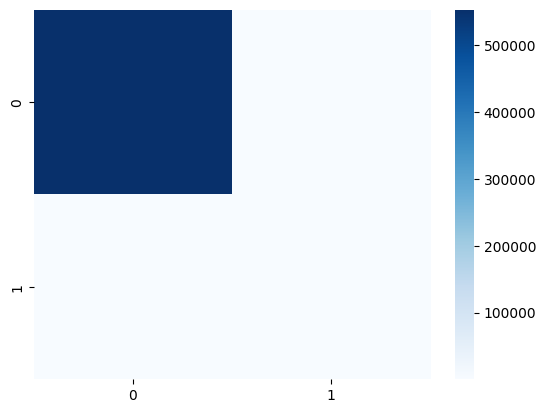

In [43]:
import seaborn as sns
sns.heatmap(data=cmRF,cmap='Blues')

In [47]:
import xgboost as xgb

model2=xgb.XGBClassifier(n_estimators=100, random_state=42)


In [48]:
model2.fit(x_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:

y_pred = model2.predict(x_test_reduced)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9924620176744002
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.08      0.09      0.08      2145

    accuracy                           0.99    555719
   macro avg       0.54      0.54      0.54    555719
weighted avg       0.99      0.99      0.99    555719

Confusion Matrix:
 [[551336   2238]
 [  1951    194]]
